## Generación de imágenes
Generar imágenes a partir de descripciones en lenguaje natural o prompts es una de las tareas de IA generativas más relevantes. Stable Diffusion es un modelo de código abierto para generar imágenes digitales de alta calidad a partir de descripciones en lenguaje natural. Basándonos en la implementación de Stable Diffusion en KerasCV se puede hacer llamadas a dicho modelo, aunque el tiempo de generación es bastante largo ...

In [1]:
import keras_cv
from tensorflow import keras
import matplotlib.pyplot as plt
# from transformers import pipeline

# Avoid some warning
%env TOKENIZERS_PARALLELISM=false

2025-01-09 08:58:18.186693: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-09 08:58:18.186724: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-09 08:58:18.187699: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-09 08:58:18.192400: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-09 08:58:18.748291: W tensorflow/compiler/tf2

Using TensorFlow backend
env: TOKENIZERS_PARALLELISM=false


By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
1356917/1356917 [==============================] - 0s 0us/step


2025-01-09 08:58:29.887538: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-01-09 08:58:29.888900: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-01-09 08:58:29.889059: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

492466864/492466864 [==============================] - 7s 0us/step


2025-01-09 08:58:39.960806: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 151781376 exceeds 10% of free system memory.
2025-01-09 08:58:41.187296: I external/local_xla/xla/service/service.cc:168] XLA service 0x557fde79b790 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-01-09 08:58:41.187334: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-01-09 08:58:41.256378: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-01-09 08:58:41.469710: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906
I0000 00:00:1736413123.295376     198 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3439090152/3439090152 [==============================] - 37s 0us/step


2025-01-09 08:59:30.526772: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 117964800 exceeds 10% of free system memory.
2025-01-09 08:59:30.703602: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 117964800 exceeds 10% of free system memory.
2025-01-09 08:59:30.879661: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 117964800 exceeds 10% of free system memory.
2025-01-09 08:59:31.112844: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 117964800 exceeds 10% of free system memory.
2025-01-09 08:59:53.162087: I external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:326] ptxas warning : Registers are spilled to local memory in function 'fusion_285', 4 bytes spill stores, 4 bytes spill loads

W0000 00:00:1736413195.196384     193 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1736413195.197700     193 graph_launch.cc:671] Fallbac

198180272/198180272 [==============================] - 2s 0us/step


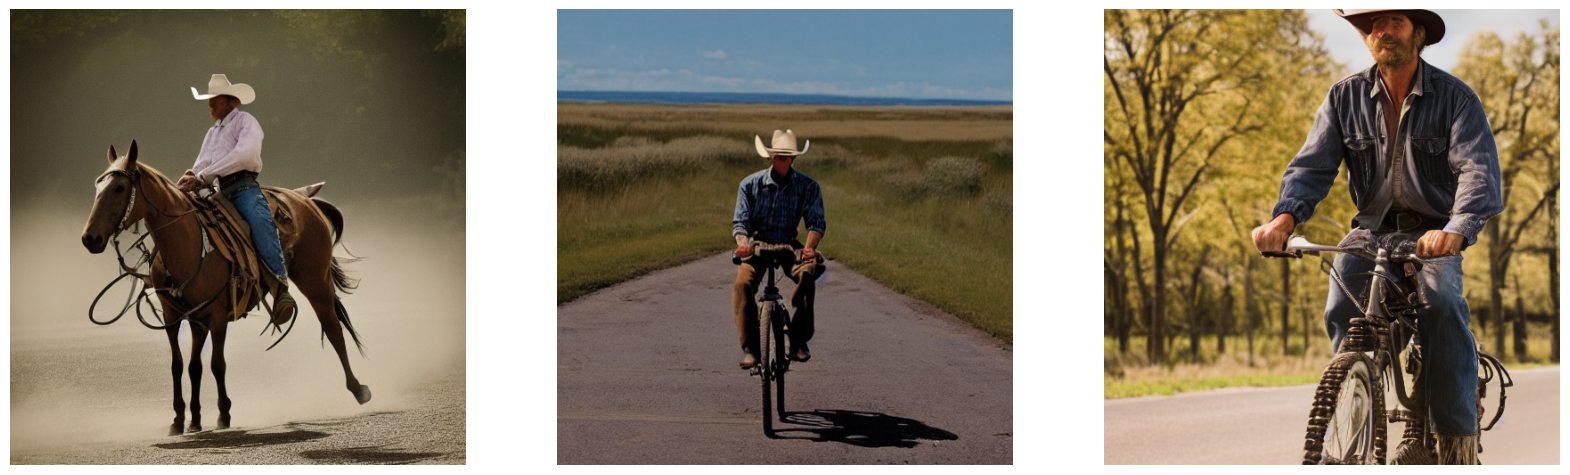

In [2]:
model = keras_cv.models.StableDiffusion(img_width=512, img_height=512)

prompt = "photograph of a cowboy riding a bike"
images = model.text_to_image(prompt, batch_size=3)

plt.figure(figsize=(20, 20))
for i in range(len(images)):
    ax = plt.subplot(1, len(images), i + 1)
    plt.imshow(images[i])
    plt.axis("off")

In [ ]:
# !nvidia-smi

# Reiniciando kernel para limpiar la memoria de la GPU
!pkill -9 -f ipykernel_launcher